# BGD Vs. SGD
### - Batch Gradient Descent
### - Stochastic GD with Batch size= 10
### - SGD with Batch size= 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from time import  time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df=pd.read_csv('data.csv', header=None)
df

,0,1
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


### Data visualization

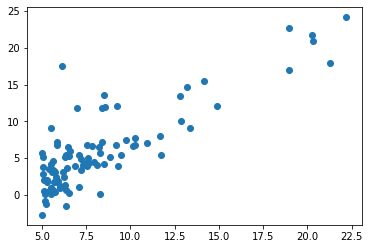

In [3]:
plt.scatter(df[0],df[1])

### Data  extracting  and Train Test Split function use

In [4]:

poly=PolynomialFeatures(degree=3)

X=df[0].values
y=df[1].values

X=X.reshape((X.shape[0],1))
X=poly.fit_transform(X)
X=X/X.max()


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=100)

In [5]:
times=dict()

In [6]:
from linear_regression import LinearRegressionMGD

## Applying BGD

In [7]:
model=LinearRegressionMGD()

In [8]:
start_time=time()

model.fit(X_train,y_train, lr=1e-2, batch_size=len(X_train), epochs=3000, threshold=1e-8, show_epochs=500)

times['BatchGD']=time()-start_time

 Epoch: 500 Cost: 1441.5666497052664 
 Epoch: 1000 Cost: 1173.303749688118 
 Epoch: 1500 Cost: 1005.198217782752 
 Epoch: 2000 Cost: 899.85560453465 
 Epoch: 2500 Cost: 833.8429393957493 
 Epoch: 3000 Cost: 792.4761137372925 


### Plot of the cost at epoch for Batch Gradient Descent

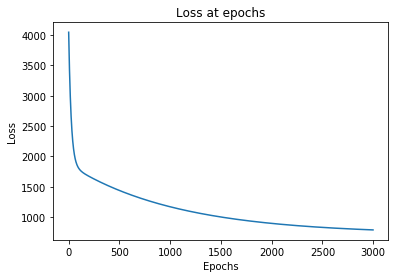

In [9]:
plt.plot(range(len(model.costs)), model.costs)
plt.title('Loss at epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### The r2_score  of our predictions

In [10]:
from sklearn.metrics import r2_score
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)

0.6253623165055229

# Stochastic Gradient Descent (Batch size = 10 )



In [11]:
model1=LinearRegressionMGD()

In [ ]:
start_time=time()

model1.fit(X_train,y_train, lr=1e-2, batch_size=10, epochs=3000, threshold=1e-8, show_epochs=500) # Note original X_train size is 77

times['SGD(size=10)']=time()-start_time

### Plot of the cost at epoch for Stochastic Gradient Descent( Batch size = 10 )

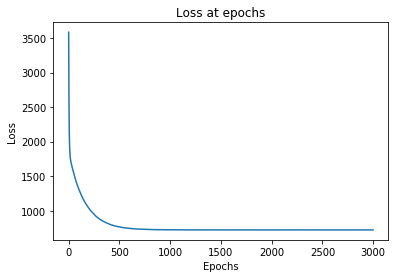

In [13]:
plt.plot(range(len(model1.costs)), model1.costs)
plt.title('Loss at epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### The r2_score of our predictions

In [14]:
from sklearn.metrics import r2_score
y_pred=model1.predict(X_test)
r2_score(y_test,y_pred)

0.5856325474709754

## Let's Apply Stochastic Gradient Descent (Batch size = 1 )

In [15]:
model2=LinearRegressionMGD()

In [16]:
start_time=time()

model2.fit(X_train,y_train, lr=1e-2, batch_size=1, epochs=3000, threshold=1e-8, show_epochs=500) # Note original X_train size is 77

times['SGD(size=1)']=time()-start_time

 Epoch: 500 Cost: 723.2165276681922 
 Epoch: 1000 Cost: 727.9661962723945 
 Epoch: 1500 Cost: 722.9534733690367 
 Epoch: 2000 Cost: 723.8212594802953 
 Epoch: 2500 Cost: 722.596485941921 
 Epoch: 3000 Cost: 722.5063635461792 


### Plot of the cost at epoch for Stochastic Gradient Descent( Batch size = 1 )

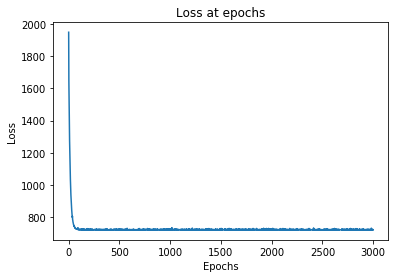

In [17]:
plt.plot(range(len(model2.costs)), model2.costs)
plt.title('Loss at epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### r2_score

In [18]:
from sklearn.metrics import r2_score
y_pred=model2.predict(X_test)
r2_score(y_test,y_pred)

0.5872147960093075

# Let's compare the 3 methods in terms of their performance

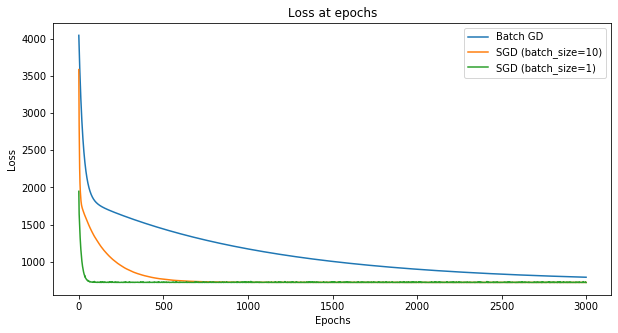

In [19]:
plt.subplots(figsize=(10,5))
plt.plot(range(len(model.costs)), model.costs, label='Batch GD')
plt.plot(range(len(model1.costs)), model1.costs, label='SGD (batch_size=10)')
plt.plot(range(len(model2.costs)), model2.costs, label='SGD (batch_size=1)')
plt.title('Loss at epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Training Time


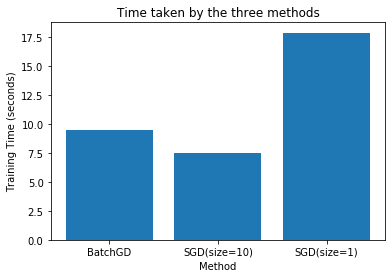

In [20]:
plt.bar(times.keys(),times.values())
plt.title('Time taken by the three methods')
plt.xlabel('Method')
plt.ylabel('Training Time (seconds)')
plt.show()

## r2_score

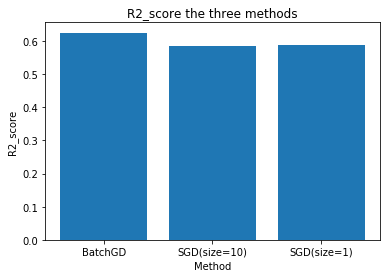

In [21]:
plt.bar(['BatchGD','SGD(size=10)','SGD(size=1)'],
          [r2_score(y_test,model.predict(X_test)),r2_score(y_test,model1.predict(X_test)),r2_score(y_test,model2.predict(X_test))])
plt.title('R2_score the three methods')
plt.xlabel('Method')
plt.ylabel('R2_score')
plt.show()